# Plane Source in an Infinite Medium

We are considering a plane symmetry where the source is concentrated in the plane 𝑋=0:


\begin{equation}
  \frac{\partial^2\phi(x)}{\partial x^2}-\frac{\phi(x)}{L^2} = - \frac{S_0(x)} {D}δ(x)
\end{equation}


If we restrict our equation in the locations 𝑋>,< 0, the source is Zero:


\begin{equation}
  \frac{\partial^2\phi(x)}{\partial x^2}-\frac{\phi(x)}{L^2} = 0
\end{equation}


We can solve the homogeneous equation than fix it adding the Boundary Condition at the origin:


\begin{align}
  \lim_{x\to 0+}-D\frac{\partial\phi}{\partial x}=\frac{S_0}{2} \\
  \lim_{x\to 0+}\phi(x)<\infty
\end{align}


*HOMOGENEOUS EQUATION SOLUTION:*


\begin{equation}
  \phi(x) = C_1\exp(-\frac{x}{L}) + C_2\exp(\frac{x}{L})
\end{equation}


*BOUNDARY CONDITIONS:*

\begin{equation}
  C_2 = 0 \\
  \lim_{x\to 0}-D(-\frac{A}{L}\exp(-\frac{x}{L}))=\frac{AD}{L}=\frac{S_0}{2}
\end{equation}


*FINAL SOLUTION:*

\begin{equation}
  \phi(x) = \frac{S_0 L}{2D}\exp(-\frac{|x|}{L})
\end{equation}

In [17]:
import sympy as sp
import numpy as np
from sympy.solvers import dsolve
import matplotlib.pyplot as plt


#variables and functions
D = sp.symbols("D")
Sigma_a = sp.Symbol("Sigma_a")
L = sp.Symbol("L")
x = sp.Symbol("x")
C1, C2 = sp.symbols("C1,C2")

Phi, S = sp.symbols("Phi, S" ,cls=sp.Function)


In [18]:
#Source
So = sp.Symbol("S_o")
Source = sp.Eq(S(x),(So*sp.DiracDelta(x)))
print("Source represented with a Delta Function: ")
Source

Source represented with a Delta Function: 


Eq(S(x), S_o*DiracDelta(x))

In [19]:
#Equation
Equation = sp.Eq(Phi(x).diff(x,2)-((Phi(x))/(L**2)),(Source.rhs/D))
Equation_Homo = Equation.subs({Source.rhs:0})
print("Equation: " + str(Equation))
print("Homogeneous Equation: ")
Equation_Homo

Equation: Eq(Derivative(Phi(x), (x, 2)) - Phi(x)/L**2, S_o*DiracDelta(x)/D)
Homogeneous Equation: 


Eq(Derivative(Phi(x), (x, 2)) - Phi(x)/L**2, 0)

In [20]:
#Homogeneous solution
Solution_Homo = sp.dsolve(Equation_Homo,Phi(x))
print("Homogeneous Solution:  ")
Solution_Homo

Homogeneous Solution:  


Eq(Phi(x), C1*exp(-x/L) + C2*exp(x/L))

In [21]:
#Boundary condition C2=0:
Solution_Homo_BC1 = Solution_Homo.rhs.subs({C2:0})
print("Solution Homogeneous imposing C2=0:  ")
Solution_Homo.subs({C2:0})

Solution Homogeneous imposing C2=0:  


Eq(Phi(x), C1*exp(-x/L))

In [22]:
#Boundary condition Phi<inf with x->0:
dPhi = sp.diff(Solution_Homo_BC1,x)
argument_condition = -D*dPhi
print("Argument of the second BC: " + str(argument_condition))
BC2 = sp.limit(argument_condition,x,0)
print("Limit of the Argument: " + str(BC2))
BC2_equation = sp.Eq(BC2,(So/2))
BC2_solution = sp.solve(BC2_equation,C1)
print("Value of C1: ")
sp.Eq(C1,BC2_solution[0])

Argument of the second BC: C1*D*exp(-x/L)/L
Limit of the Argument: C1*D/L
Value of C1: 


Eq(C1, L*S_o/(2*D))

In [23]:
#Solution of the Homogeneous for x>0:
Solution1 = Solution_Homo_BC1.subs({C1:BC2_solution[0]})
print("Final Solution for x>0: ")
sp.Eq(Phi(x),Solution1)

Final Solution for x>0: 


Eq(Phi(x), L*S_o*exp(-x/L)/(2*D))

In [24]:
#Solution of the Homogeneous for x<0:
Solution2 = Solution1.subs({x:-x})
print("Final Solution for x<0: ")
sp.Eq(Phi(x),Solution2)

Final Solution for x<0: 


Eq(Phi(x), L*S_o*exp(x/L)/(2*D))

In [25]:
#Solution of the Homogeneous:
Solution_Complete = Solution1.subs({x:abs(x)})
print("Final Complete Solution for x<0 and x>0: ")
sp.Eq(Phi(x),Solution_Complete)

Final Complete Solution for x<0 and x>0: 


Eq(Phi(x), L*S_o*exp(-Abs(x)/L)/(2*D))

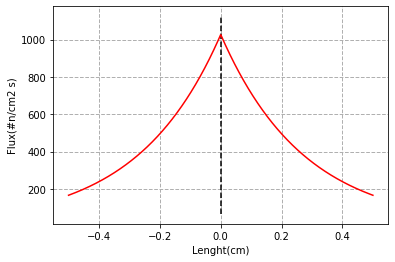

In [26]:
Sigma_t_val = 0.25 #cm-1
Sigma_s_val = 0.15 #cm-1
Sigma_a_val = Sigma_t_val - Sigma_s_val
D_val = 1/(3*Sigma_t_val)
L_val = np.sqrt(Sigma_a_val/D_val)
So_val = 10 ** 4 #cm-3 s-1

distance = np.linspace(-0.5,0.5,1000)
Solution_Complete_evaluated = Solution_Complete.subs({D:D_val, L:L_val, So:So_val, Sigma_a:Sigma_a_val})

Solution_discrete1 = sp.lambdify(x,Solution_Complete_evaluated)
Solution_discrete2 = Solution_discrete1(distance)

plt.plot(distance,Solution_discrete2,"r")
plt.xlabel("Lenght(cm)")
plt.ylabel("Flux(#n/cm2 s)")
plt.vlines(0,min(Solution_discrete2)-100, max(Solution_discrete2)+100, color="black", linestyle="--")
plt.grid("gray", linestyle="--", linewidth=1)

**Fourier Transform**

Now we try to solve everything using transformations. As we are in space (from ∞ to -∞), the most appropriate transformation is the Fourier transform.
Note that to evaluate the transform explicitly you need to have as symbolic variable only x and the transform variable.
Note that we need to manually apply the properties for the transform of a derivative:

\begin{equation}
  F(d^{n}x) = (iω)^{n}*F(x)
\end{equation}

Applying Fourier Transformation to the whole equation, here reported:

\begin{equation}
  \frac{\partial^2\phi(x)}{\partial x^2}-\frac{\phi(x)}{L^2} = - \frac{S_0(x)} {D}δ(x)
\end{equation}

We obtain:

\begin{equation}
  -\omega^{2} F[\varphi(x)] - \frac{F[\varphi(x)]}{L^2} + \frac{S_0}{D} = 0
\end{equation}


In [27]:
#Problem in Fourier Transform
omega = sp.symbols("omega", real=True, nonzero=True)

Phi_Tilde = sp.fourier_transform(Phi(x),x,omega)
Diff2_Phi_Tilde = Phi_Tilde*(-omega**2)

Fourier_Equation = sp.Eq(Diff2_Phi_Tilde - Phi_Tilde/(L**2),-So/D)
print("Equation:\n")
Fourier_Equation

Equation:



Eq(-omega**2*FourierTransform(Phi(x), x, omega) - FourierTransform(Phi(x), x, omega)/L**2, -S_o/D)

In [28]:
#Solution Fourier Transform
Fourier_Solution = sp.solve(Fourier_Equation,Phi_Tilde)
print("Solution:\n")
sp.Eq(Phi_Tilde,Fourier_Solution[0])

Solution:



Eq(FourierTransform(Phi(x), x, omega), L**2*S_o/(D*(L**2*omega**2 + 1)))

In [29]:
#Inverted Solution
Solution_Inverted = Fourier_Solution[0].subs({So:So_val,D:D_val,L:L_val,})
Fourier_Inverted_Solution = sp.inverse_fourier_transform(Solution_Inverted, omega, x) / (2*sp.pi)
Fourier_Inverted_Solution = Fourier_Inverted_Solution.subs({x:abs(x)})
print("Solution for the Flux:\n")
sp.Eq(Phi(x) , Fourier_Inverted_Solution)

Solution for the Flux:



Eq(Phi(x), 1026.97979532219*exp(-7.30296743340221*pi*Abs(x)))

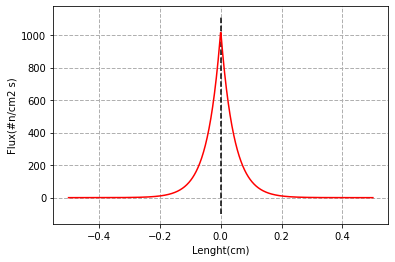

In [30]:
#plotting

distance2 = np.linspace(-0.5,0.5,1000)

Fourier_discrete1 = sp.lambdify(x , Fourier_Inverted_Solution)
Fourier_discrete2 = Fourier_discrete1(distance2)

plt.plot(distance2,Fourier_discrete2,"r")
plt.xlabel("Lenght(cm)")
plt.ylabel("Flux(#n/cm2 s)")
plt.vlines(0,min(Fourier_discrete2)-100, max(Fourier_discrete2)+100, color="black", linestyle="--")
plt.grid("gray", linestyle="--", linewidth=1)